In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [5]:
df.shape

(11142, 10)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

<Figure size 800x500 with 0 Axes>

### Transaction Type Distribution

Text(0.5, 0, 'Transaction Type')

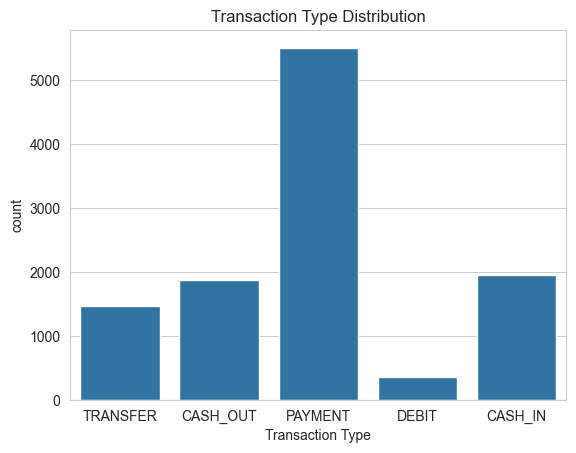

In [12]:
sns.countplot(data=df, x="type")
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")

### Fraud vs Non-Fraud Count

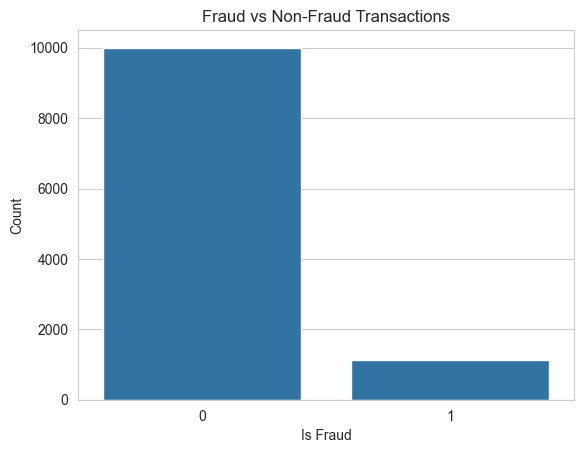

In [13]:
sns.countplot(data=df, x="isFraud")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

### Fraud by Transaction Type

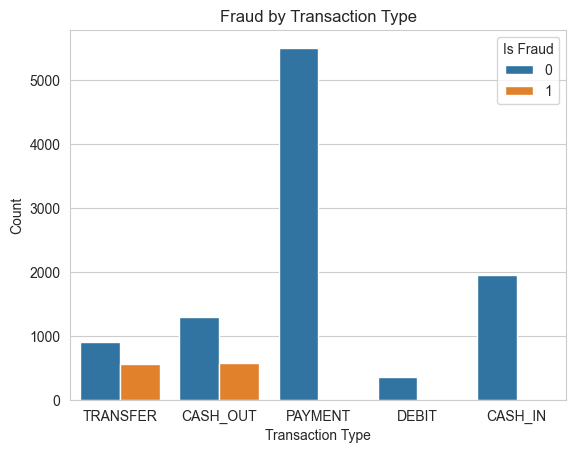

In [14]:
sns.countplot(data=df, x="type", hue="isFraud")
plt.title("Fraud by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()


Fraud mostly happens in TRANSFER and CASH_OUT transactions, while PAYMENT, DEBIT, and CASH_IN rarely involve fraud.

This shows that fraudsters mainly target money transfers and cash withdrawals, so these transaction types are very important for detecting fraud.

### Transaction Amount vs Fraud

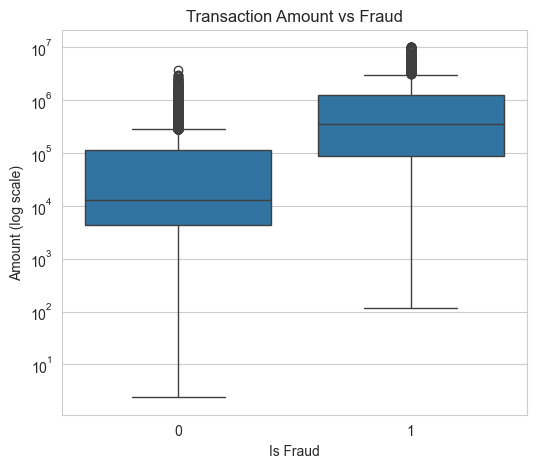

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="isFraud", y="amount")
plt.yscale("log")  # helps visualize extreme values
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Amount (log scale)")
plt.show()


Fraud transactions usually involve larger amounts than normal transactions.

This shows that fraudsters often try to move high-value money, making transaction amount an important factor for detecting fraud.

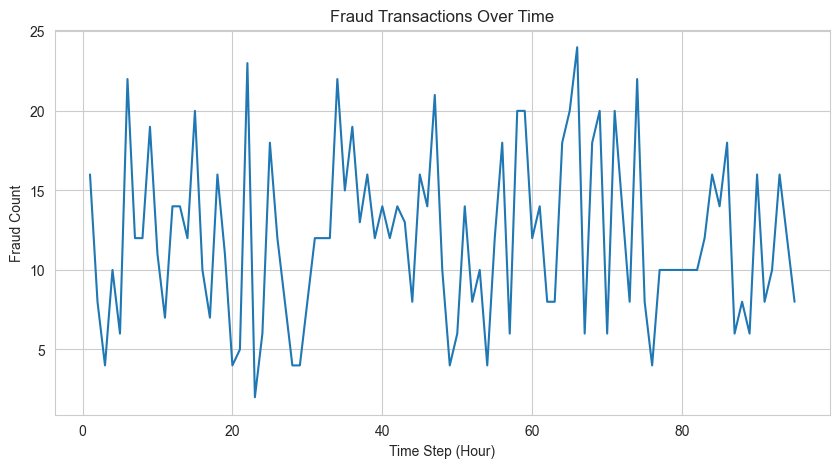

In [16]:
fraud_time = df[df["isFraud"] == 1].groupby("step").size()

plt.figure(figsize=(10,5))
fraud_time.plot()
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time Step (Hour)")
plt.ylabel("Fraud Count")
plt.show()


Fraud does not happen evenly over time; it increases suddenly at some hours.

This means fraud occurs in bursts, so watching transactions by time can help catch fraud early.

Correlation Heatmap

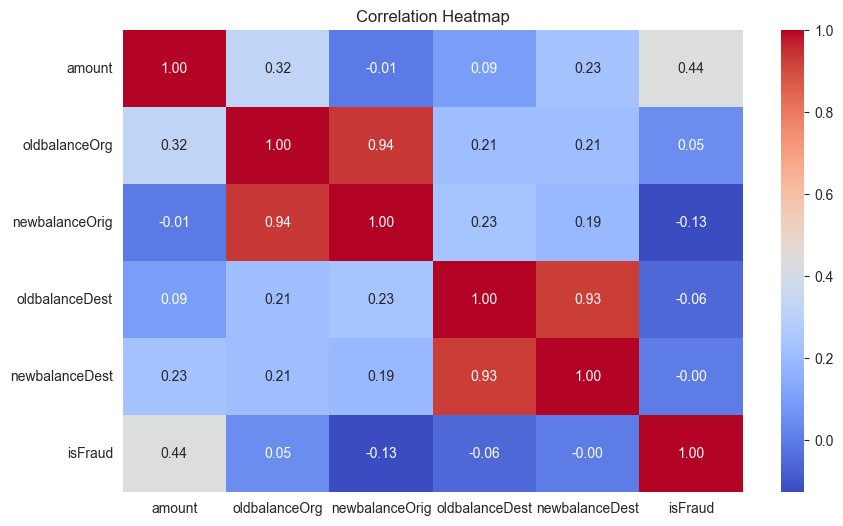

In [17]:
num_cols = [
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest",
    "isFraud"
]

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Feature Extraction

In [18]:
df.drop(['nameOrig', 'nameDest'],axis =1, inplace = True)

In [19]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,False,False,False,True
1,1,181.0,181.0,0.0,21182.0,0.0,1,True,False,False,False
2,1,2806.0,2806.0,0.0,0.0,0.0,1,False,False,False,True
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,True,False,False,False
4,1,20128.0,20128.0,0.0,0.0,0.0,1,False,False,False,True


In [21]:
df["balanceDiffOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

## Model Training

In [22]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balanceDiffOrg,balanceDiffDest
0,1,181.0,181.0,0.0,0.0,0.0,1,False,False,False,True,181.0,0.0
1,1,181.0,181.0,0.0,21182.0,0.0,1,True,False,False,False,181.0,-21182.0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,False,False,False,True,2806.0,0.0
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,True,False,False,False,2806.0,-26202.0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,False,False,False,True,20128.0,0.0


In [24]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from scipy.stats import loguniform, randint

In [28]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        class_weight="balanced",
        max_iter=1000
    ))
])

param_lr = {
    "model__C": loguniform(1e-3, 1e2),
    "model__solver": ["lbfgs", "liblinear"]
}

rs_lr = RandomizedSearchCV(
    pipe_lr,
    param_lr,
    n_iter=20,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs_lr.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step..._iter=1000))])
,param_distributions,"{'model__C': <scipy.stats....t 0x10d835bd0>, 'model__solver': ['lbfgs', 'liblinear']}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [29]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("model", RandomForestClassifier(
        class_weight="balanced",
        random_state=42
    ))
])

param_rf = {
    "model__n_estimators": randint(100, 300),
    "model__max_depth": randint(5, 30),
    "model__min_samples_split": randint(2, 10)
}

rs_rf = RandomizedSearchCV(
    pipe_rf,
    param_rf,
    n_iter=20,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__max_depth': <scipy.stats....t 0x10b20f010>, 'model__min_samples_split': <scipy.stats....t 0x10cf96980>, 'model__n_estimators': <scipy.stats....t 0x10da7d810>}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline([
    ("model", GradientBoostingClassifier(random_state=42))
])

param_gb = {
    "model__n_estimators": randint(100, 300),
    "model__learning_rate": loguniform(0.01, 0.2),
    "model__max_depth": randint(3, 6)
}

rs_gb = RandomizedSearchCV(
    pipe_gb,
    param_gb,
    n_iter=20,
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs_gb.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__learning_rate': <scipy.stats....t 0x10db8d7b0>, 'model__max_depth': <scipy.stats....t 0x10db8c1c0>, 'model__n_estimators': <scipy.stats....t 0x10cf97fd0>}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [32]:
models = {
    "Logistic Regression": rs_lr.best_estimator_,
    "Random Forest": rs_rf.best_estimator_,
    "Gradient Boosting": rs_gb.best_estimator_
}

for name, model in models.items():
    print(f"\n{name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2502
           1       0.90      0.95      0.92       284

    accuracy                           0.98      2786
   macro avg       0.95      0.97      0.96      2786
weighted avg       0.98      0.98      0.98      2786


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2502
           1       1.00      0.96      0.98       284

    accuracy                           1.00      2786
   macro avg       1.00      0.98      0.99      2786
weighted avg       1.00      1.00      1.00      2786


Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2502
           1       1.00      0.98      0.99       284

    accuracy                           1.00      2786
   macro avg       1.00      0.99      0.99      2786
weighted avg       

Three models were tuned using RandomizedSearchCV and evaluated using F1-score due to class imbalance. The model with the best fraud detection performance was selected as the final estimator.

<Figure size 500x400 with 0 Axes>

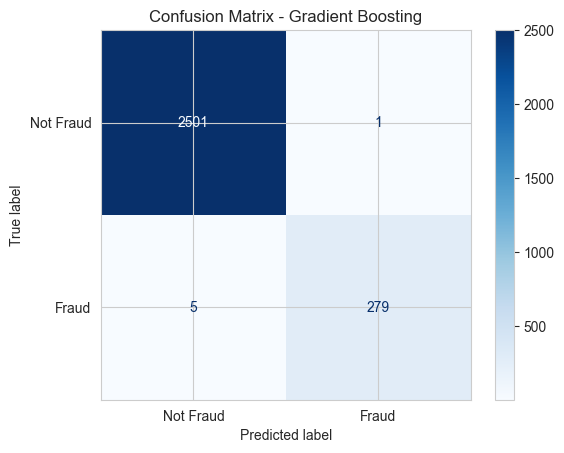

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

gb_model = rs_gb.best_estimator_

y_pred_gb = gb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Fraud", "Fraud"]
)

plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

- The model misses very few fraud cases, which means it is able to catch most fraudulent transactions.

- It does not wrongly flag any genuine transactions as fraud, so real customers are not disturbed. This is important for maintaining customer trust.

- The Gradient Boosting model performs very well on this dataset because it can learn complex patterns in the data.

- Overall, the model shows high accuracy, catches most fraud cases, and avoids false alarms, making it a good choice for fraud detection in this project.

### What is the model's precision and accuracy in detecting fraudulent transactions?

- Precision, 
When the model says a transaction is fraud, how often is it correct?
0.9964

- Accuracy,
How often is the model correct overall?
0.9979

### How reliable is the model in classifying transactions as legitimate or fraudulent

- The model shows very strong reliability in distinguishing between fraudulent and legitimate transactions.

- It correctly identifies almost all fraudulent transactions, missing only a very small number. This means the risk of fraud slipping through the system is very low.

- At the same time, it almost never misclassifies legitimate transactions as fraud, so genuine customers are not wrongly blocked or inconvenienced.

- The high precision indicates that when the model flags a transaction as fraud, it is almost always correct.

- The high accuracy shows that the model performs well across both classes—fraud and non-fraud.

## ⚠️ Potential Losses Due to Model Errors

### ❌ False Negatives (Missed Fraud)
False negatives occur when a fraudulent transaction is wrongly classified as legitimate.  
These cases lead to **direct financial loss** because the fraud is not blocked.  
In this model, the number of false negatives is very low, so only a small amount of fraud goes undetected.

---

### ⚠️ False Positives (False Alarms)
False positives occur when a legitimate transaction is wrongly classified as fraud.  
These cases do not cause direct financial loss but can lead to **customer inconvenience** and **operational costs**.  
The model produces almost no false positives, so genuine customers are rarely affected.


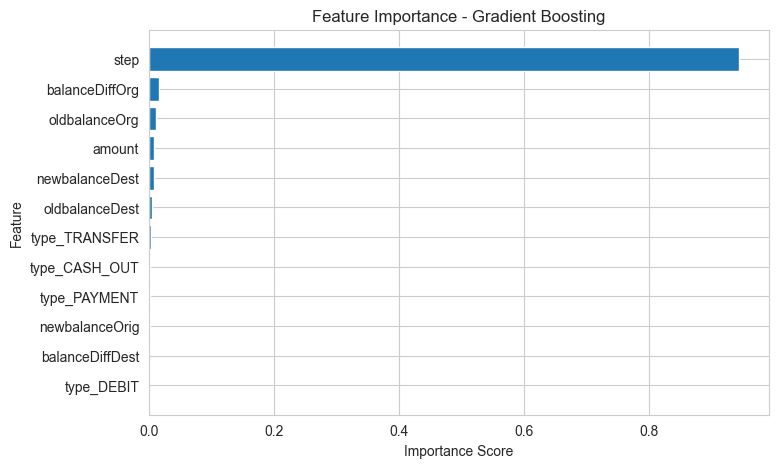

In [34]:
gb_clf = rs_gb.best_estimator_.named_steps["model"]

importances = gb_clf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

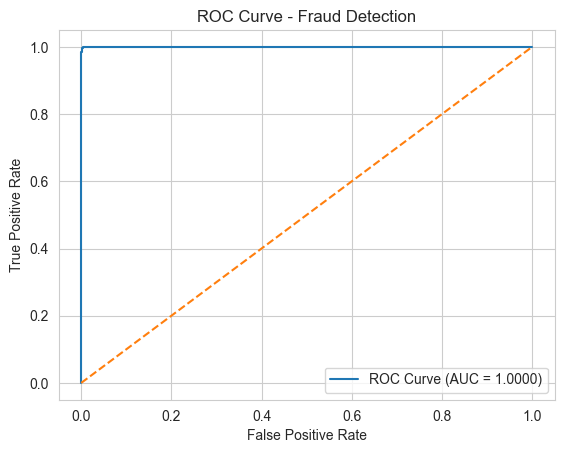

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend(loc="lower right")
plt.show()


## 📈 ROC–AUC Curve

The ROC–AUC curve shows how well the model separates fraud from non-fraud transactions.  
A high ROC–AUC value indicates excellent model performance and strong classification ability.


In [51]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


0.9999620022292026

In [52]:
y_test.value_counts(normalize=True)


isFraud
0    0.898062
1    0.101938
Name: proportion, dtype: float64

In [43]:
import joblib

model_artifacts = {
    "model": rs_gb.best_estimator_,   # this is a Pipeline
    "feature_names": X_train.columns.tolist()
}

joblib.dump(
    model_artifacts,
    "app/artifacts/fraud_detection_model.joblib"
)


['app/artifacts/fraud_detection_model.joblib']